***Michael McCormack***

In the Week 04 file folder you'll find the anonymous New York op ed from September 5, 2018, together with samples of writings of the main suspects. 

Use any tools you like to figure out who wrote the op ed. If you can find more writings of these people, please send them my way.



How I approached this problem - 

Let me first say that this is a incredibly interesting problem that demonstrates a very relevant application of NLP.  I had a lot of fun doing this project. 

I began by doing some exploring on the internet.  I came across this idea of determining author based on sentence structure.  Below is an example of this idea used in a Kaggle competition.

https://www.kaggle.com/christopher22/stylometry-identify-authors-by-sentence-structure/notebook

Basically the idea is that you break down each training document by sentence and add a label for the author of each sentence.  

I start off by reading in the training files into pandas DataFrames.  I then add a column indicating the author Next I concatenate all the dataframes together so

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, auc, roc_curve

from nltk.tokenize import sent_tokenize
import re
import nltk

In [2]:
with open('Dan Coats.txt', 'r+') as in_file:
    textDan = in_file.read()
    sentsDan = nltk.sent_tokenize(textDan)
    
pdDan = pd.DataFrame({'sentence':sentsDan})
pdDan['author'] = 'Dan Coats'


with open('James Mattis.txt', 'r+') as in_file:
    textMattis = in_file.read()
    sentsMattis = nltk.sent_tokenize(textMattis)
    
pdMattis = pd.DataFrame({'sentence':sentsMattis})
pdMattis['author'] = 'James Mattis'


with open('John Kelly.txt', 'r+') as in_file:
    textKelly = in_file.read()
    sentsKelly = nltk.sent_tokenize(textKelly)
    
pdKelly = pd.DataFrame({'sentence':sentsKelly})
pdKelly['author'] = 'John Kelly'


with open('Kevin Hassett.txt', 'r+') as in_file:
    textHassett = in_file.read()
    sentsHassett = nltk.sent_tokenize(textHassett)
    
pdHassett = pd.DataFrame({'sentence':sentsHassett})
pdHassett['author'] = 'Kevin Hassett'

with open('Kirstjen Nielsen.txt', 'r+') as in_file:
    textNielsen = in_file.read()
    sentsNielsen = nltk.sent_tokenize(textNielsen)
    
pdNielsen = pd.DataFrame({'sentence':sentsNielsen})
pdNielsen['author'] = 'Kirstjen Nielsen'

with open('Larry Kudlow.txt', 'r+') as in_file:
    textKudlow = in_file.read()
    sentsKudlow = nltk.sent_tokenize(textKudlow)
    
pdKudlow = pd.DataFrame({'sentence':sentsKudlow})
pdKudlow['author'] = 'Larry Kudlow'


with open('Mike Pence.txt', 'r+') as in_file:
    textPence = in_file.read()
    sentsPence = nltk.sent_tokenize(textPence)
    
pdPence = pd.DataFrame({'sentence':sentsPence})
pdPence['author'] = 'Mike Pence'

with open('Mike Pompeo.txt', 'r+') as in_file:
    textPompeo = in_file.read()
    sentsPompeo = nltk.sent_tokenize(textPompeo)
    
pdPompeo = pd.DataFrame({'sentence':sentsPompeo})
pdPompeo['author'] = 'Mike Pompeo'



train = pd.DataFrame()
train = pd.concat([pdDan, pdMattis,pdKelly,pdHassett,pdNielsen,pdKudlow,pdPence,pdPompeo])

In [3]:
author_to_num ={'Dan Coats': "Chicken", 'James Mattis': "Punk", 
                'John Kelly': "perp", 'Kevin Hassett': "Garbage",
                  'Kirstjen Nielsen': "Scum", 'Larry Kudlow': "Toilet", 
                'Mike Pence': "Poop", 'Mike Pompeo': "Yuck"}

train["author"].replace(author_to_num, inplace=True)
author = train['author'].tolist()

In [4]:
text = train['sentence'].tolist()
"""
get rid of non-breaking spaces,
double spaces,
NEW LINES
other unicode
"""
text = [t.replace('\xa0', ' ').replace("\u2028", " ").replace(u'\ufeff',' ') \
        .replace('\n', " ").replace("  ", " ") for t in text]

print("there are ", len(text), "sentences")

there are  1069 sentences


In [5]:
#print(text)#train['sentence'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(text, author, test_size=0.25, random_state=1337)

In [7]:
"""
ngram range is the bounds for ngrams to be extracted
here, we do word unigram and bigrams

min_df is setting thresh for minimal number of occurences.
"""
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=0,
                            strip_accents="unicode")

vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [9]:
X_train_vect = vectorizer.transform(X_train)
print("the tf-idf vectors have ", X_train_vect.shape[-1], "dimensions")

### Test the model
#X_train, X_test, y_train, y_test = train_test_split(vectors, author, test_size=0.35, random_state=1337)
svm = LinearSVC(penalty="l2", dual=False,
                                       tol=1e-3)
svm.fit(X_train_vect, y_train)

print("testing accuracy: ", svm.loss)

X_test_vect = vectorizer.transform(X_test)
predictions = svm.predict(X_test_vect)
#print(list(predictions[0:10]))

the tf-idf vectors have  17963 dimensions
testing accuracy:  squared_hinge


In [10]:
precision, recall, fscore, support = score(y_test, predictions, average="macro")
accuracy = round((accuracy_score(y_test, predictions) *100))

print("classification report:")
print(classification_report(y_test, predictions))

print("confusion matrix:")
print(confusion_matrix(y_test, predictions))

# print("AUC:")
# fpr, tpr, thresholds = roc_curve(y_test, predictions)
# print(auc(fpr, tpr))


print("""
Model test results for Linear SVC:

Precision: {}
Recall: {}
Accuracy: {}
Support: {}
""".format(precision, recall, fscore, support))

classification report:
             precision    recall  f1-score   support

    Chicken       0.91      0.58      0.71        36
    Garbage       0.69      0.77      0.73        56
       Poop       1.00      0.75      0.86        16
       Punk       0.86      0.67      0.75        27
       Scum       1.00      1.00      1.00         8
     Toilet       0.72      0.70      0.71        44
       Yuck       0.80      0.76      0.78        37
       perp       0.64      0.93      0.76        44

avg / total       0.78      0.75      0.75       268

confusion matrix:
[[21  4  0  1  0  1  3  6]
 [ 1 43  0  0  0  6  0  6]
 [ 1  1 12  0  0  2  0  0]
 [ 0  2  0 18  0  0  3  4]
 [ 0  0  0  0  8  0  0  0]
 [ 0  7  0  1  0 31  1  4]
 [ 0  5  0  0  0  1 28  3]
 [ 0  0  0  1  0  2  0 41]]

Model test results for Linear SVC:

Precision: 0.8281612443823301
Recall: 0.770122191997192
Accuracy: 0.7871876923053136
Support: None



In [11]:
# #opEd = pd.read_table("OpEd.txt", header =None)
# #opEd.columns = ['text']

# #test = opEd['text'].tolist()


# with open('OpEd.txt', 'r+') as in_file:
#     textOpEd = in_file.read()
#     sentsOpEd = nltk.sent_tokenize(textOpEd)


# test = pd.DataFrame({'sentence':sentsOpEd})
# print(test)

# X_test=vectorizer.transform(test)

# # testVector = vectorizer.fit_transform(test)
# # X_test=vectorizer.transform(test)
# # print(vectors.shape)


# predictions = svm.predict(X_test)

# #predictedAuthor = mode(predictions)

# predictedAuthordf = pd.DataFrame(predictions)
# predictedAuthordf.columns = ['Author']
# predictedAuthordf = predictedAuthordf['Author'].value_counts().reset_index()
# predictedAuthordf = pd.DataFrame(predictedAuthordf)
# predictedAuthordf.columns = ['Author','Count']
# predictedAuthordf["Probability"] = predictedAuthordf["Count"]/(predictedAuthordf['Count'].sum())
# predictedAuthordf["logLikelihood"] = np.log( predictedAuthordf["Probability"])

# prediction = predictedAuthordf['logLikelihood'].idxmax()
# predictedAuthor = predictedAuthordf.at[prediction,'Author']

# print(predictedAuthordf,"\n\n")


# #predictedAuthor = (list(possibleAuthors.keys())[list(possibleAuthors.values()).index(predictedAuthor)]) 
# print("The predicted author is: ", predictedAuthor)

In [12]:

opEd = pd.read_table("OpEd.txt", header =None)
opEd.columns = ['text']

test = opEd['text'].tolist()
test = [t.replace('\xa0', ' ').replace("\u2028", " ").replace(u'\ufeff',' ') \
        .replace('\n', " ").replace("  ", " ") for t in text]

X_test=vectorizer.transform(test)

# testVector = vectorizer.fit_transform(test)
# X_test=vectorizer.transform(test)
# print(vectors.shape)


predictions = svm.predict(X_test)

predictedAuthordf = pd.DataFrame(predictions)
predictedAuthordf.columns = ['Author']
predictedAuthordf = predictedAuthordf['Author'].value_counts().reset_index()
predictedAuthordf = pd.DataFrame(predictedAuthordf)
predictedAuthordf.columns = ['Author','Count']
predictedAuthordf["Probability"] = predictedAuthordf["Count"]/(predictedAuthordf['Count'].sum())
predictedAuthordf["logLikelihood"] = np.log( predictedAuthordf["Probability"])

prediction = predictedAuthordf['logLikelihood'].idxmax()
predictedAuthor = predictedAuthordf.at[prediction,'Author']

print(predictedAuthordf,"\n\n")


#predictedAuthor = (list(possibleAuthors.keys())[list(possibleAuthors.values()).index(predictedAuthor)]) 
print("The predicted author is: ", predictedAuthor)





    Author  Count  Probability  logLikelihood
0     perp    211     0.197381      -1.622621
1  Garbage    200     0.187091      -1.676162
2   Toilet    196     0.183349      -1.696364
3     Yuck    179     0.167446      -1.787093
4  Chicken     96     0.089804      -2.410131
5     Punk     92     0.086062      -2.452690
6     Poop     57     0.053321      -2.931428
7     Scum     38     0.035547      -3.336893 


The predicted author is:  perp


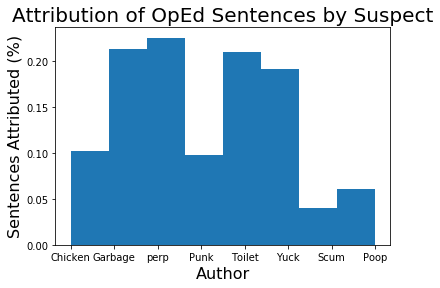

In [13]:
bins = len(set(predictions))
plt.hist(predictions, density=True, align="mid", bins=bins)
plt.xticks(range(bins))
plt.ylabel("Sentences Attributed (%)", fontsize=16)
plt.xlabel("Author", fontsize=16)
plt.title("Attribution of OpEd Sentences by Suspect", fontsize=20)
plt.savefig("tf-idf oped deanon.png")
plt.show()

Visualizing prediction distribution

In [ ]:
bins = len(set(predictions))

plt.hist(predictions, color = "skyblue", normed=True, align="mid",bins= bins)
plt.xticks(range(bins))
plt.ylabel("Probability",fontsize=16)
plt.xlabel("Author",fontsize=16)
plt.title("Distribution of Predictions",fontsize=20)

plt.show()




c = collections.Counter(predictions)
c = sorted(c.items())
months_num = [i[0] for i in c]
freq = [i[1] for i in c]

suffixes = []
for item in months_num:
    suffixes.append(item.split()[-1])
    
    

plt.bar(suffixes, freq)
plt.xlabel("Author",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("Counts of Predicted Authors", fontsize=20)
plt.show()


# 